In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
#데이터 불러오기
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 8s 1us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [17]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))
unique,counts=np.unique(y_test,return_counts=True)
print('Test labels:',dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Train labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


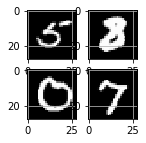

In [18]:
# 4개의 임의 표본 추출하기
indices=np.random.randint(0,x_train.shape[0],size=4)
images=x_train[indices]
labels=y_train[indices]
# 4개 표본 그림그리기
plt.figure(figsize=(2,2))
for i in range(len(indices)):
    plt.subplot(2,2,i+1)
    image=images[i]
    plt.imshow(image, cmap='gray')
    plt.grid('off')
plt.show()

In [21]:
# one-hot coding을 위한 라이브러리 불러오기
from keras.utils import np_utils, plot_model
num_features=784  #x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(-1,num_features).astype('float32')# 또는 np.reshape(x_train, (-1,num_features)).astype('float32')
x_test=x_test.reshape(-1,num_features).astype('float32')

#reshape안에 '-1'대신 x_train.shape[0]을 써도 되지만 '-1'을 해줌으로써 해당 axis의 값을 스스로 계산하게 한다.
#예를 들어 x의 shape이 (100,200,3)일 때 x.reshape(-1,100)으로 하면 x의 shape은 (600,100)으로 된다.

x_train=x_train/255.
x_test=x_test/255.

# 10개의 범주형 자료를 one-hot 벡터로 바꿔주기
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(y_train.shape)

(60000, 10, 2)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


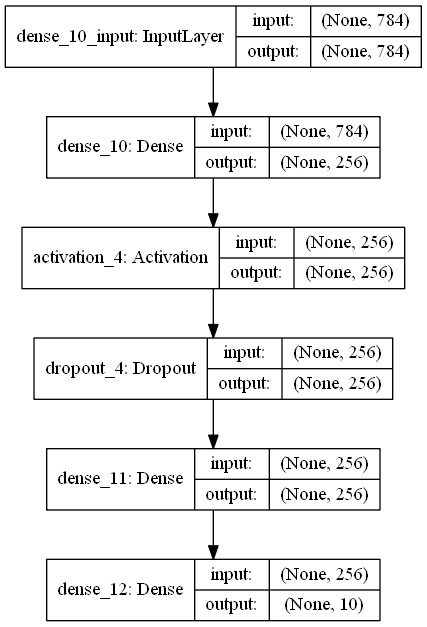

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#2개의 은닉층과 1개의 출력층으로 구성된 MLP모형
model=Sequential()
model.add(Dense(256,input_dim=num_features)) #input은 1D tensor
model.add(Activation('relu'))
# 또는 model.add(Dense(256, input_dim=num_features,activation='relu'))로 Dense와 Activation을 함께 쓸 수 있음
model.add(Dropout(0.45))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()
plot_model(model,to_file='C:/Users/ysp/Desktop/딥러닝 프로그램/ch2_1.png', show_shapes=True)

In [8]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64,validation_data=(x_val,y_val))
history_out=history.history
history_out.keys()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 35us/step - loss: 0.3375 - accuracy: 0.8981 - val_loss: 0.1414 - val_accuracy: 0.9564
Epoch 2/10
50000/50000 [==============================] - 2s 32us/step - loss: 0.1650 - accuracy: 0.9493 - val_loss: 0.1077 - val_accuracy: 0.9673
Epoch 3/10
50000/50000 [==============================] - 2s 33us/step - loss: 0.1324 - accuracy: 0.9594 - val_loss: 0.0981 - val_accuracy: 0.9691
Epoch 4/10
50000/50000 [==============================] - 2s 34us/step - loss: 0.1143 - accuracy: 0.9628 - val_loss: 0.0830 - val_accuracy: 0.9756
Epoch 5/10
50000/50000 [==============================] - 2s 34us/step - loss: 0.0986 - accuracy: 0.9680 - val_loss: 0.0877 - val_accuracy: 0.9753
Epoch 6/10
50000/50000 [==============================] - 2s 31us/step - loss: 0.0905 - accuracy: 0.9706 - val_loss: 0.0880 - val_accuracy: 0.9740
Epoch 7/10
50000/50000 [==============================] - 2s 33us/st

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

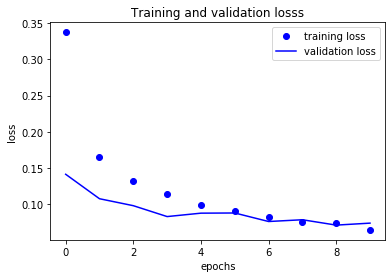

In [13]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss,'bo',label='training loss')
plt.plot( loss_val,'b', label='validation loss' )
plt.title('Training and validation losss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

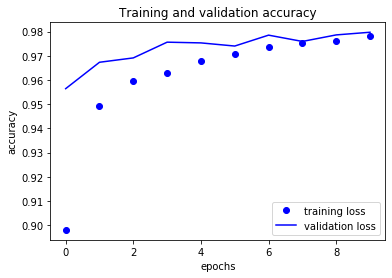

In [14]:
plt.clf()
plt.plot(accuracy,'bo',label='training loss')
plt.plot(accuracy_val,'b', label='validation loss' )
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)


Epoch 1/30
60000/60000 [==============================] - 2s 33us/step - loss: 0.0732 - accuracy: 0.9771
Epoch 2/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.0678 - accuracy: 0.9789
Epoch 3/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.0628 - accuracy: 0.9795
Epoch 4/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.0614 - accuracy: 0.9800
Epoch 5/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.0565 - accuracy: 0.9810
Epoch 6/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.0525 - accuracy: 0.9829
Epoch 7/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.0514 - accuracy: 0.9838
Epoch 8/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.0486 - accuracy: 0.9841
Epoch 9/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.0484 - accuracy: 0.9840
Epoch 10/30
60000/60000 [==============================

In [61]:
import pandas as pd
result_train=model.evaluate(x_train,y_train)
result_test=model.evaluate(x_test,y_test)
print(result_train)
print(result_test)
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred.head()

10000/10000 [==============================] - 0s 25us/step
[0.0016932068984431984, 0.9996166666666667]
[0.07724655894196203, 0.9853]


,0,1,2,3,4,5,6,7,8,9
0,6.194058e-20,1.543851e-16,5.002994e-12,5.879471e-12,1.921653e-17,2.172387e-20,8.632302e-35,1.000000e+00,1.505898e-15,1.402312e-10
1,1.773110e-15,1.343046e-16,1.000000e+00,2.149296e-15,3.389081e-21,1.079731e-18,7.891478e-17,2.729345e-17,1.753549e-15,1.040158e-20
2,1.003085e-12,9.999998e-01,1.764042e-07,2.180762e-11,4.792377e-10,6.744931e-13,8.021288e-09,8.970715e-08,1.060192e-08,1.556031e-15
3,1.000000e+00,2.679071e-22,8.096132e-12,6.897116e-14,3.153140e-16,2.451457e-12,1.956611e-10,2.660714e-17,2.974304e-18,1.921593e-11
4,1.328908e-09,3.842744e-12,2.796849e-11,8.706871e-13,9.999994e-01,4.950115e-14,9.592601e-10,4.728687e-07,6.603913e-11,1.569124e-07


In [69]:
import numpy as np
from keras.layers import Dense, Dropout, Input
from keras.models import Model
x=Input(shape=(num_features,))
h1=Dense(256, activation='relu')(x)
h1=Dropout(0.45)(h1)
h2=Dense(256, activation='relu')(h1)
out=Dense(num_classes, activation='softmax')(h2)
model=Model(inputs=x, outputs=out)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
model.fit(x_train,y_train,epochs=30,batch_size=64)

Epoch 1/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3077 - acc: 0.9065
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.1544 - acc: 0.9529
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.1252 - acc: 0.9620
Epoch 4/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.1051 - acc: 0.9670
Epoch 5/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0950 - acc: 0.9699
Epoch 6/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0870 - acc: 0.9719
Epoch 7/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0801 - acc: 0.9748
Epoch 8/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0717 - acc: 0.9768
Epoch 9/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0701 - acc: 0.9779
Epoch 10/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.0638 - acc: 0.9792